# PyFlo Rational Method Demo

PyFlo is an open-source library for performing hydraulic and hydrology stormwater analysis. Features include network hydraulic grade analysis and time/iteration based storage and flood routing simulations.

The rational method, used by LA County and the method we are probably more familiar with, uses time of concentration, site area, and runoff coefficient. Runoff coefficients come from soil classification curves for soil types 2-180 and are based on rainfall intensity.

In [1]:
#import necessary modules
import pyflo
import pandas as pd
import numpy as np
from matplotlib import pyplot

from pyflo import system
from pyflo.rational import hydrology

Time of concentration is the total overland sheet flow, shallow concentrated flow, open channel and pipe flow (whichever is applicable) in minutes. 

The area can either be the total site area or the subarea in acres. 

The combined runoff coefficient depends on the impervious and pervious areas of the site and their coefficients combined.

In [11]:
#define variables

#time of concentration in minutes
tc_input = 27

#area in acres
area_input = 0.25

#runoff coefficient
c_input = 0.2584

Scaled precipitation data for the site of interest is used in order to easier analyze precipitation patterns and trends over different time distributions. 

The time is represented usually over one hour and precipitation is then represented by a single rate, which can be scaled to different precipitation amounts in inches over a certain number of hours.

In [12]:
#read the runoff csv file as a dataframe
runoff_df = pd.read_csv('data/orange.csv')

#convert the runoff dataframe to a numpy array
rainfall_dist = np.array(runoff_df)

#use a scaled distribution of 6 inches over 8 hours
rainfall_depths = rainfall_dist * [8.0, 6.0]  

The hydrological inputs are used to classify the "basin", which in this package represents the watershed draining to a node with hydrology attributes, dimensions, and methods.

In [13]:
basin = hydrology.Basin(tc=tc_input, area=area_input, c=c_input)

In [14]:
hydrograph = basin.flood_hydrograph(rainfall_depths, interval=0.3)

The hydrograph can be plotted using pyplot.

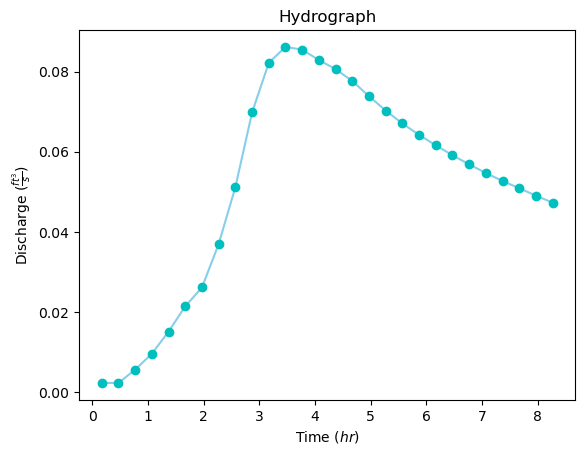

In [15]:
from matplotlib import pyplot

x = hydrograph[:, 0]
y = hydrograph[:, 1]
pyplot.plot(x, y, 'skyblue')
pyplot.plot(x, y, 'co')
pyplot.title(r'Hydrograph')
pyplot.xlabel(r'Time ($hr$)')
pyplot.ylabel(r'Discharge ($\frac{ft^{3}}{s}$)')
pyplot.show()